In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Substitua 'caminho/para/seu/dataset.csv' pelo caminho do seu arquivo CSV
caminho_do_csv = 'winequality-red.csv'

# Lê o arquivo CSV e armazena em um DataFrame
df = pd.read_csv(caminho_do_csv)
#df = df.head(100)

#print(tabulate(df.head(), headers='keys', tablefmt='grid'))

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

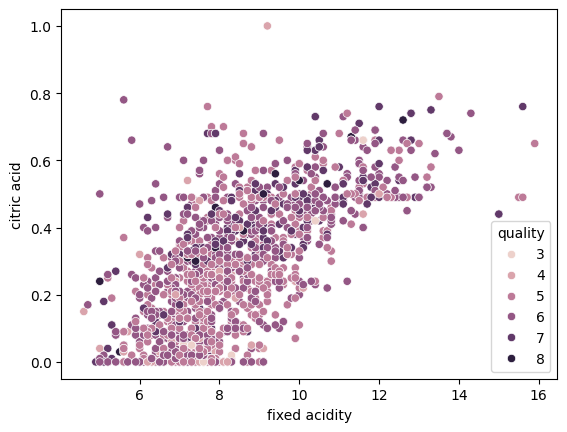

In [31]:
sns.scatterplot(x=df['fixed acidity'],y=df['citric acid'], hue=df['quality'])

In [32]:
# Split the data into features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df.drop(columns=['density'], inplace=True)


In [33]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [34]:
y_pred = knn.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


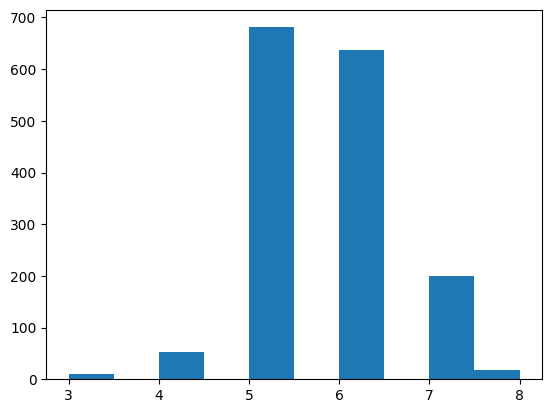

In [36]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['quality'],bins=10)
plt.show()